In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, plot_confusion_matrix, classification_report, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, roc_auc_score

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

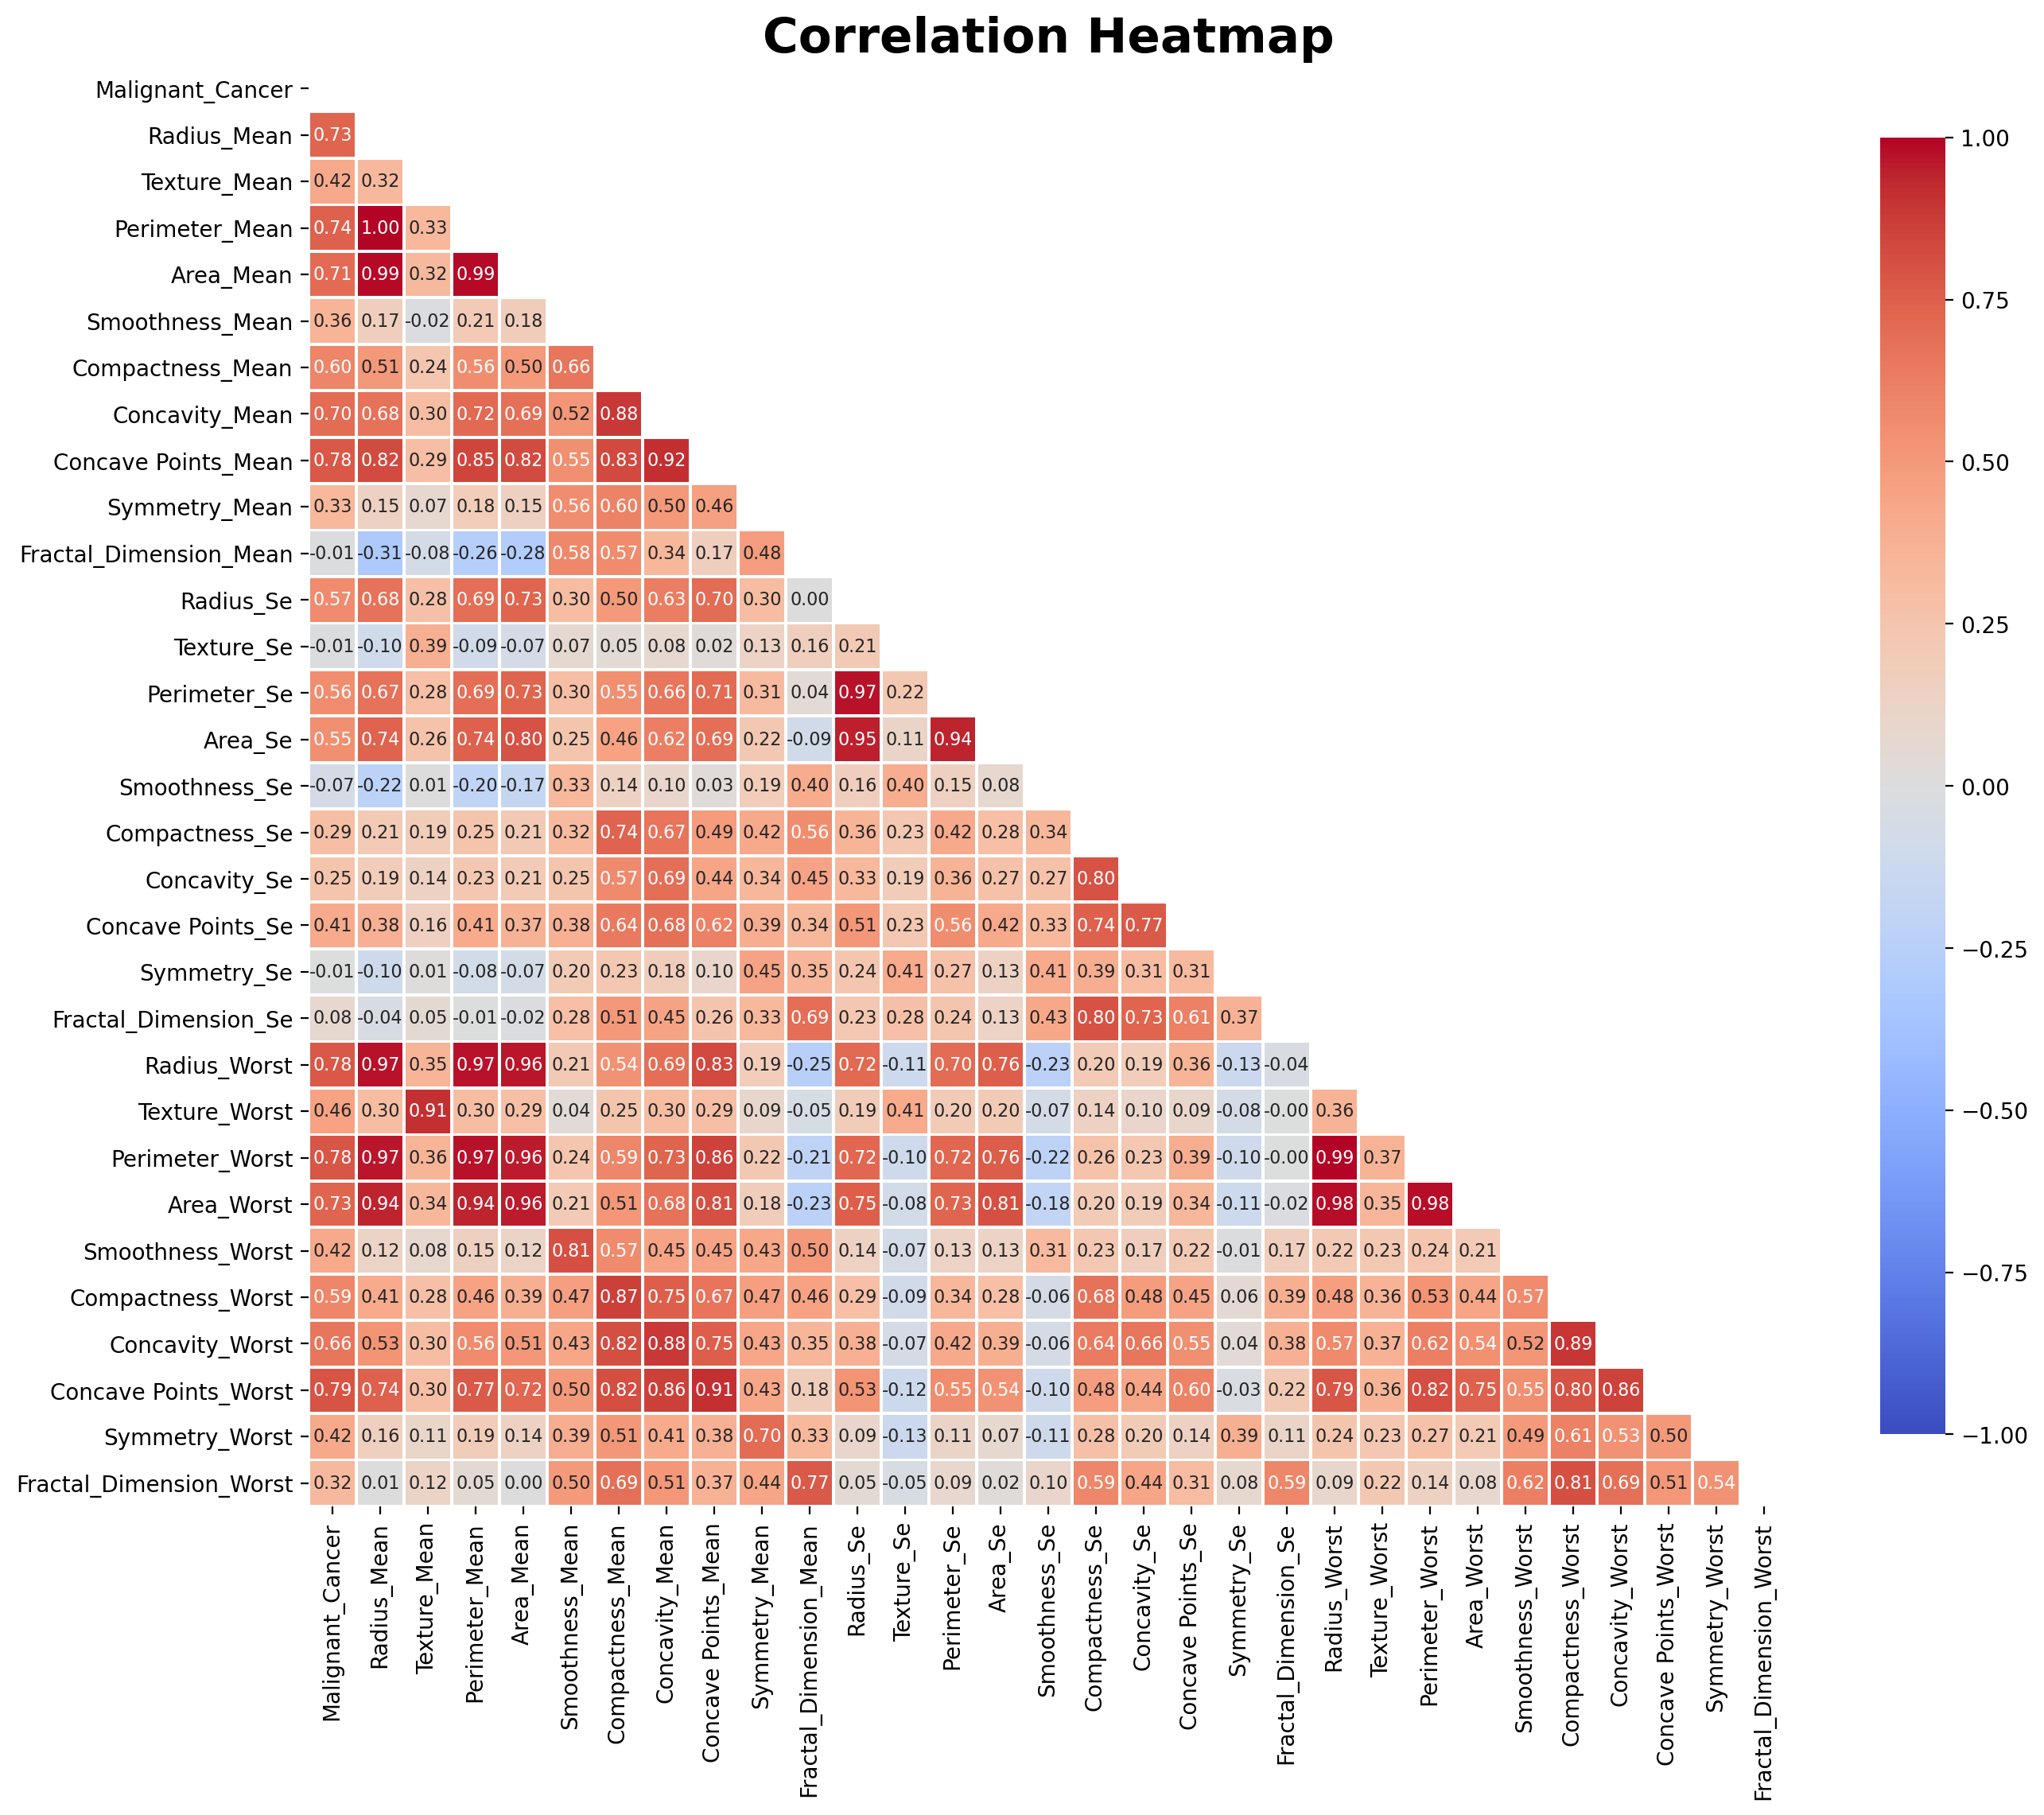

In [8]:
df= pd.read_csv(r"D:\kaggle\input\breast-cancer.csv")
df.head()
df.shape
df.info()

# drop unused column

df_corr= df.copy()
df_corr= df_corr.drop("id", axis= "columns")


# make dummy column 

df_corr["diagnosis"]= df_corr["diagnosis"].map({"M": 1, "B": 0})
df_corr= df_corr.rename({"diagnosis": "malignant_cancer"}, axis= "columns")


# make correlation df

data= df_corr.corr()
data_cancer= pd.DataFrame(data["malignant_cancer"]).drop("malignant_cancer", axis= "rows")
data_cancer = data_cancer.sort_values("malignant_cancer", ascending= False)

fig, ax = plt.subplots(figsize=(15, 12), dpi= 200)

mask = np.triu(np.ones_like(data, dtype = bool))

cmap = sns.color_palette("coolwarm", as_cmap=True)

sns.heatmap(data = data, mask = mask, annot=True, fmt=".2f", cmap=cmap, linewidths= 1, 
            vmin=-1, vmax=1, cbar_kws={"shrink": .9}, annot_kws={"size":8})

yticks = [i.title() for i in data.index]
xticks = [i.title() for i in data.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
plt.title("Correlation Heatmap", fontsize=22, fontweight= "bold")
plt.show()

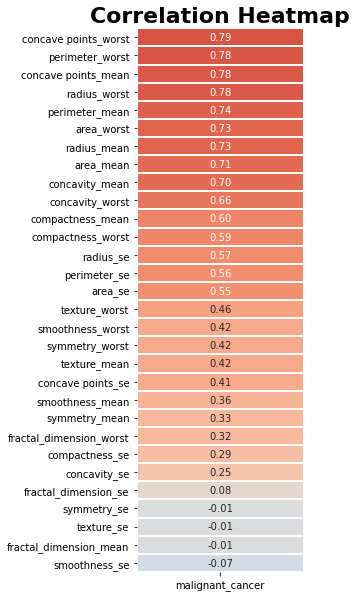

In [9]:
fig, ax = plt.subplots(figsize=(3, 10))

cmap = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(data = data_cancer, annot=True, fmt=".2f", cmap=cmap, linewidths= 1, 
            vmin=-1, vmax=1, cbar= False)

plt.title("Correlation Heatmap", fontsize=22, fontweight= "bold")

plt.show()

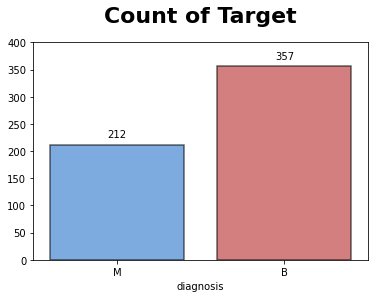

In [11]:
plot= sns.countplot(data= df, x= "diagnosis", palette=['#0b6fe7',"#cf1112"], 
              alpha= 0.6, edgecolor="0", linewidth=1.5)

for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.0f'),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), ha='center', va='center',
        size=10, xytext=(0, 10),
        textcoords='offset points')
    
plt.ylim(0, 400)
plt.title("Count of Target", fontsize=22, fontweight= "bold", pad= 20)
plt.ylabel("")

plt.show()

In [16]:
df= df.rename({"diagnosis": "malignant_cancer"}, axis= "columns")
X= df.drop(["id", "malignant_cancer"], axis= "columns")
y= df["malignant_cancer"]
y= y.map({"M": 1, "B": 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 100)

scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)
scaled

scaler= StandardScaler()

scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)
len(X_test_scaled)

np.concatenate([X_train_scaled, X_test_scaled])

array([[ 1.63778435,  0.69058337,  1.59642841, ...,  1.94073323,
        -0.17893458, -0.42321035],
       [ 0.95974698,  1.48955865,  0.9567039 , ..., -0.04390113,
        -2.21807726, -0.8842889 ],
       [-0.1012822 , -0.67306359, -0.14692405, ..., -0.39586965,
        -0.11242177, -0.32659791],
       ...,
       [-0.2090873 ,  0.55468728, -0.25093087, ..., -0.87162761,
        -0.40822874, -0.97685172],
       [ 1.60090366,  0.58046068,  1.59230115, ...,  1.73595715,
         2.05624584, -0.24791951],
       [-0.25447892,  0.3602153 , -0.22038919, ...,  0.08235179,
        -0.53775368, -0.099819  ]])

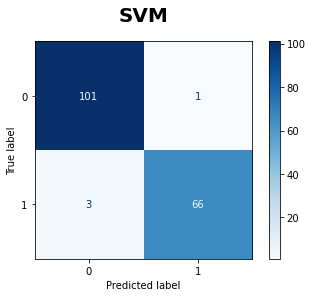

,Model,Accuracy,Precision,Recall,F1 Score
0,SVM,0.976608,0.985075,0.956522,0.970588


In [20]:
svc_model= SVC()

svc_model.fit(X_train_scaled, y_train)

y_pred= svc_model.predict(X_test_scaled)

results_df_2 = pd.DataFrame(
    data=[["SVM", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

#results_df = results_df.append(results_df_2, ignore_index=True)

cm = confusion_matrix(y_test, y_pred)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_svm.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("SVM", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

results_df = pd.DataFrame(
    data=[["SVM", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_df

roc_auc_score for SVM:  0.9733589087809037


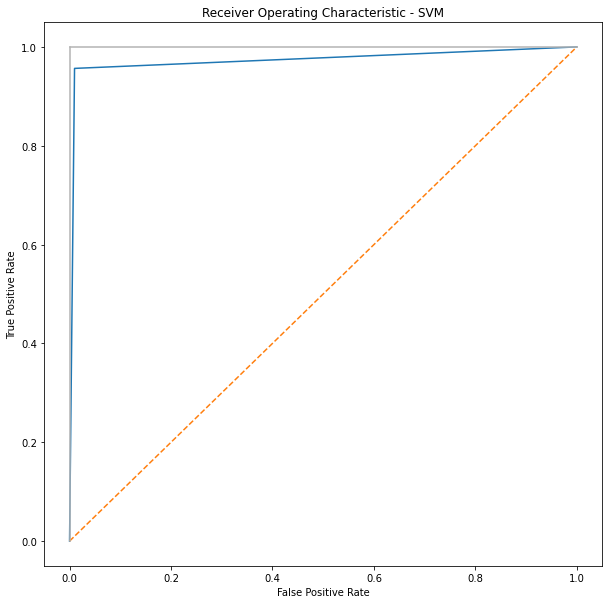

In [25]:
#=============PLOT FOR SVM==========================#
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)
print('roc_auc_score for SVM: ', roc_auc_score(y_test, y_pred))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

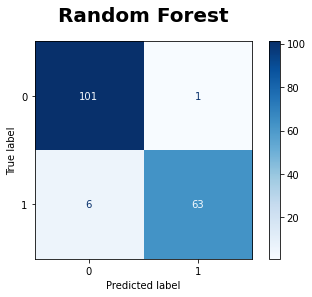

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.959064,0.984375,0.913043,0.947368


In [27]:
#===============RANDOM FOREST CLASSIFIER=======================================#
rf_model= RandomForestClassifier()

rf_model.fit(X_train_scaled, y_train)

y_pred= rf_model.predict(X_test_scaled)

results1_df = pd.DataFrame(
    data=[["Random Forest", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


cm = confusion_matrix(y_test, y_pred)
disp_rf= ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_rf.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Random Forest", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

results1_df

roc_auc_score for SVM:  0.9516197783461211


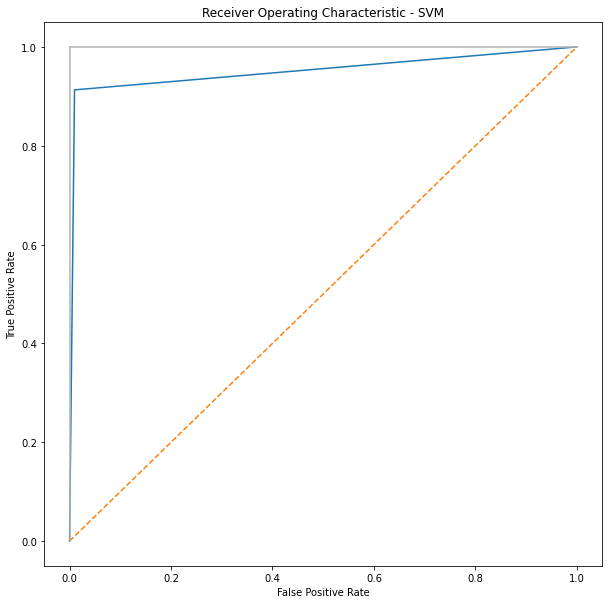

In [28]:
#===================plot for random forest==========================#
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)
print('roc_auc_score for SVM: ', roc_auc_score(y_test, y_pred))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()